In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
housing=pd.read_csv('C:/Users/Hari/Desktop/place/multiple and single regression models/HousingMLR.csv')

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
housing.size

7085

In [7]:
housing.shape

(545, 13)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

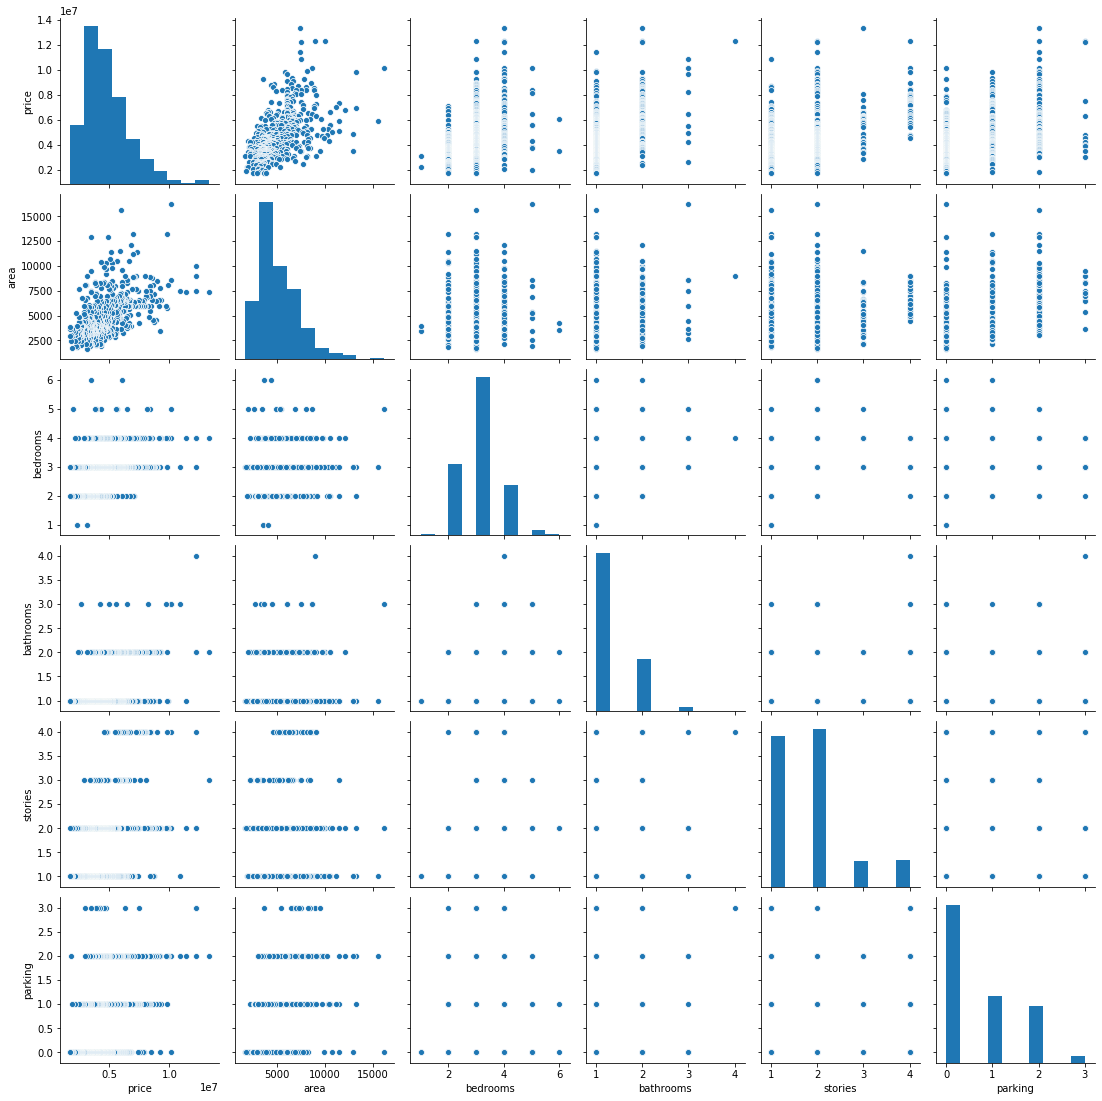

In [11]:
sns.pairplot(housing)
plt.show()

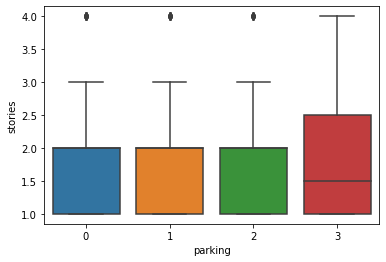

In [12]:
sns.boxplot(x='parking',y='stories',data=housing)
plt.show()

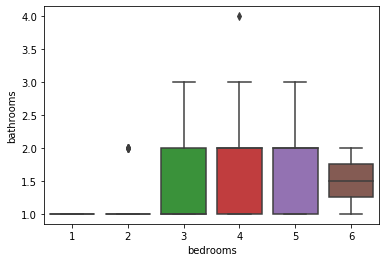

In [13]:
sns.boxplot(x='bedrooms',y='bathrooms',data=housing)
plt.show()

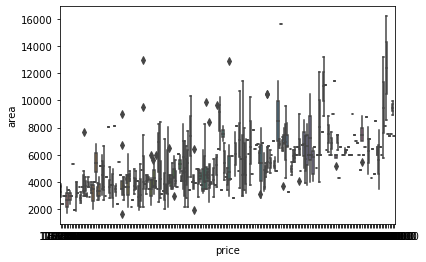

In [14]:
sns.boxplot(x='price',y='area',data=housing)
plt.show()

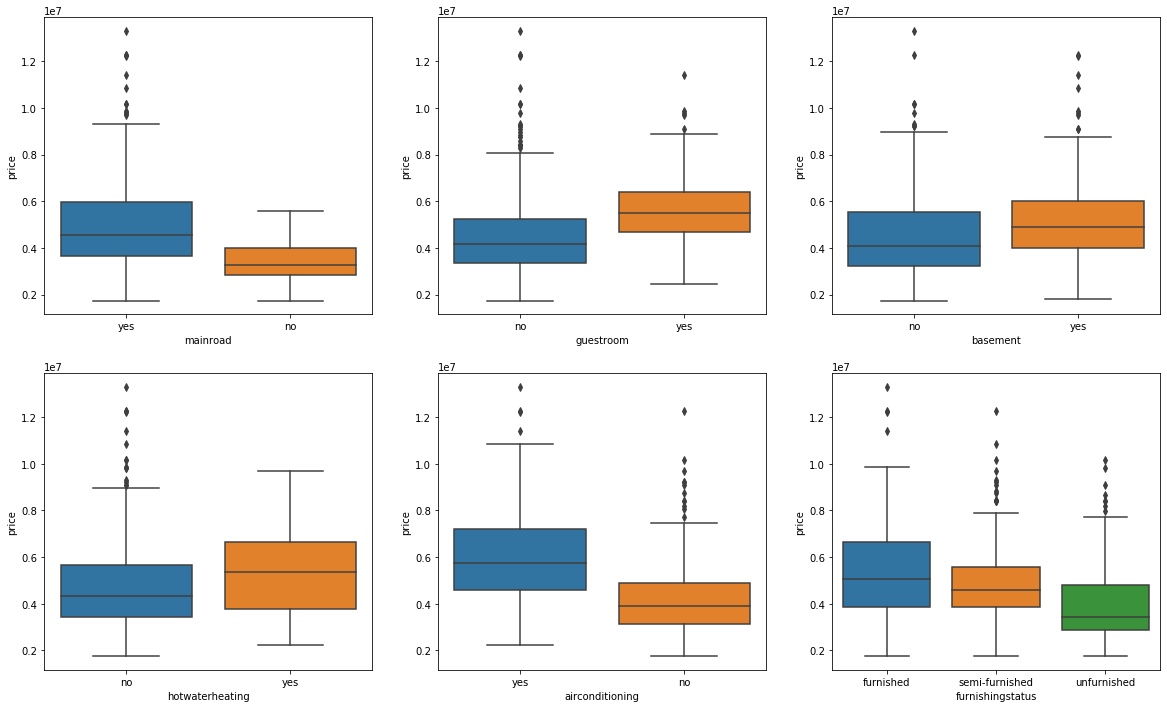

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

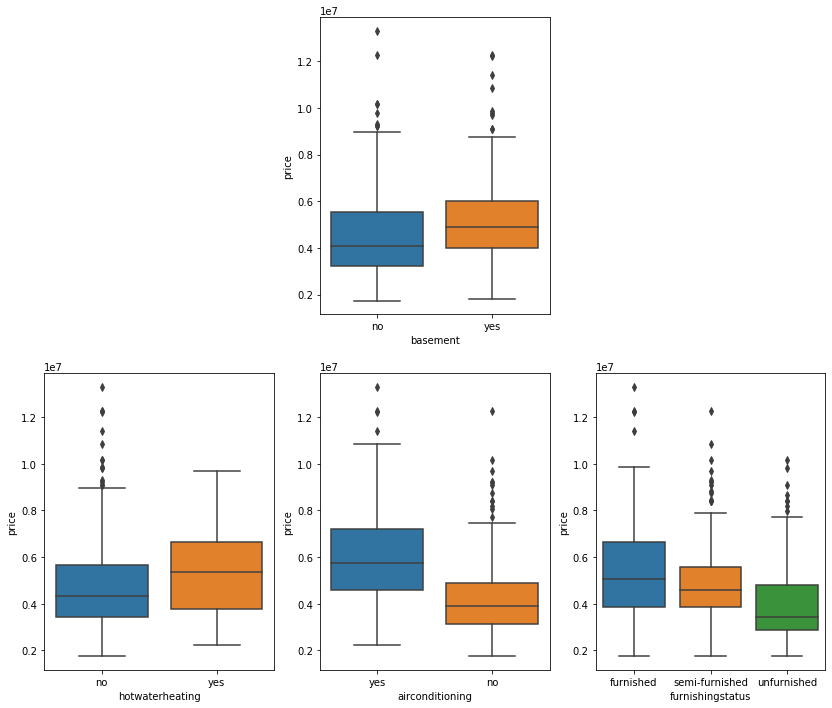

In [16]:
plt.figure(figsize=(14, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

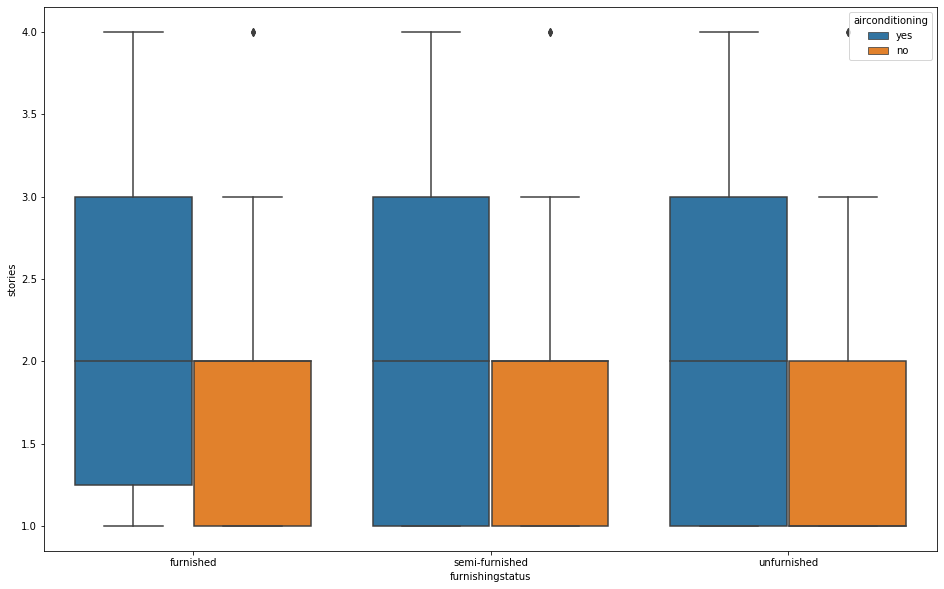

In [17]:
plt.figure(figsize = (16, 10))
sns.boxplot(x = 'furnishingstatus', y = 'stories', hue = 'airconditioning', data = housing)
plt.show()

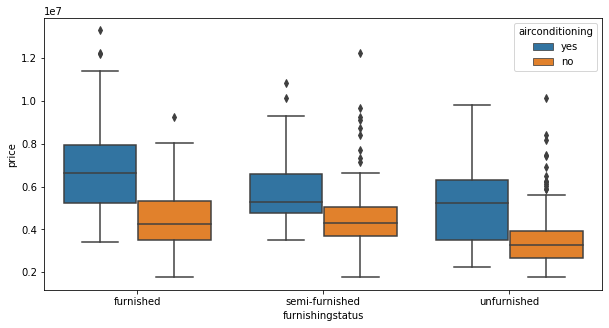

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [19]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[varlist] = housing[varlist].apply(binary_map)

In [20]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [21]:
status = pd.get_dummies(housing['furnishingstatus'])

In [22]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [23]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [24]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [25]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [31]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


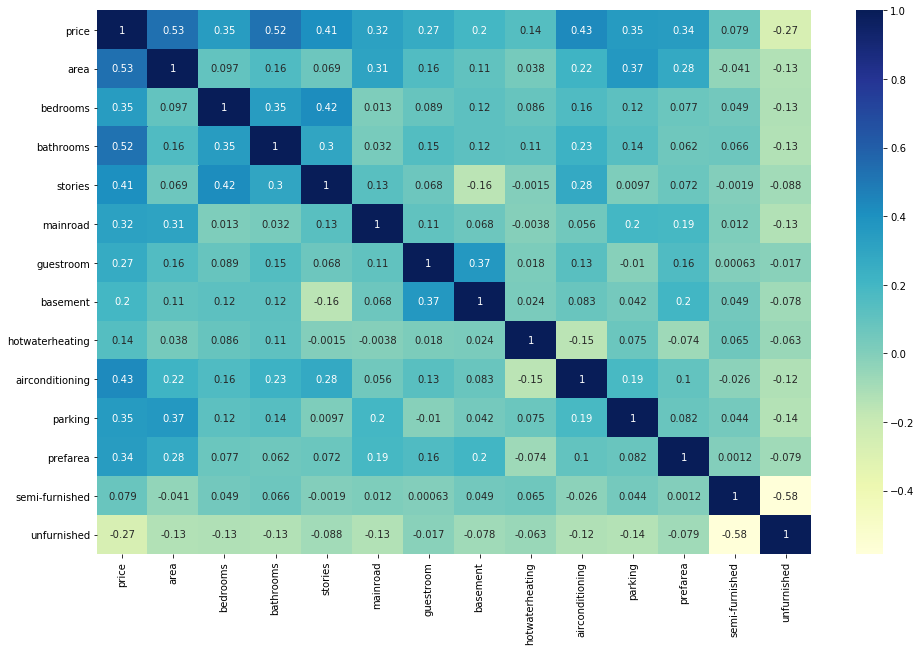

In [32]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

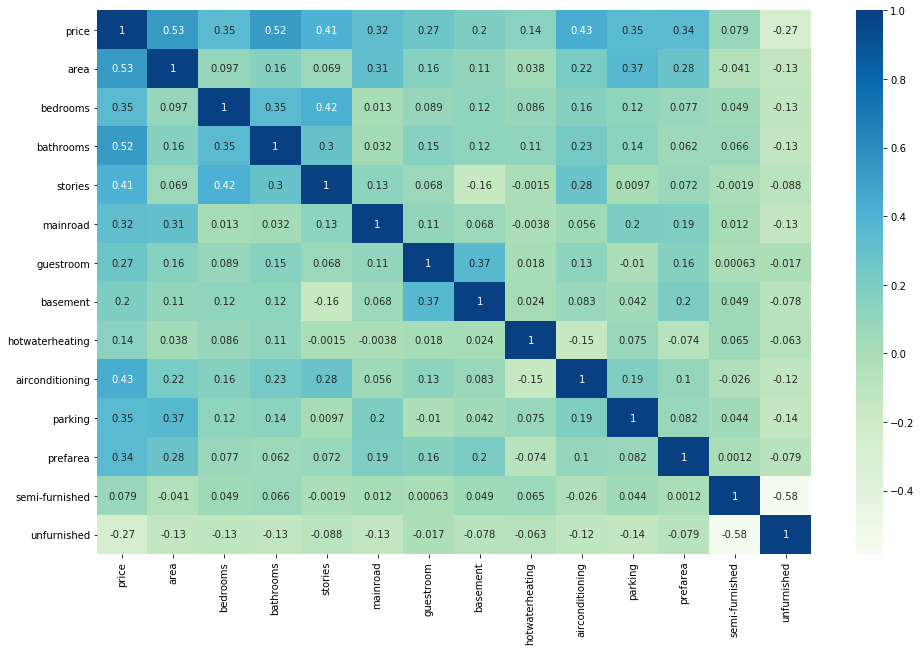

In [33]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="GnBu")
plt.show()

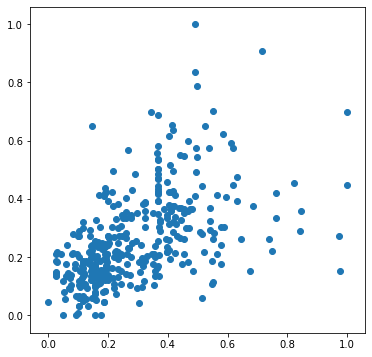

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

In [35]:
y_train = df_train.pop('price')
X_train = df_train

In [36]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['area']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [37]:
lr.params

const    0.126894
area     0.462192
dtype: float64

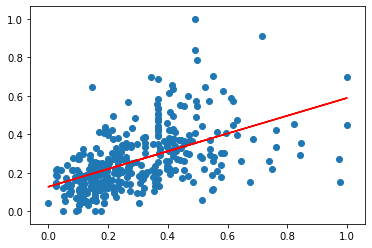

In [38]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [39]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 13 May 2020   Prob (F-statistic):           3.15e-29
Time:                        09:10:42   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [40]:
X_train_lm = X_train[['area', 'bedrooms']]

In [41]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.009919
area        0.436721
bedrooms    0.321801
dtype: float64

In [47]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              674.3
Date:                Wed, 13 May 2020   Prob (F-statistic):                   2.69e-170
Time:                        09:16:03   Log-Likelihood:                          312.54
No. Observations:                 381   AIC:                                     -617.1
Df Residuals:                     377   BIC:                                     -601.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
X_train_lm1 = X_train[['area', 'bedrooms','bathrooms','stories']]

In [50]:
# Build a linear model

import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

area         0.427597
bedrooms     0.176865
bathrooms    0.221971
stories      0.125088
dtype: float64

In [51]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              674.3
Date:                Wed, 13 May 2020   Prob (F-statistic):                   2.69e-170
Time:                        09:17:52   Log-Likelihood:                          312.54
No. Observations:                 381   AIC:                                     -617.1
Df Residuals:                     377   BIC:                                     -601.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [53]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [54]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              674.3
Date:                Wed, 13 May 2020   Prob (F-statistic):                   2.69e-170
Time:                        09:21:49   Log-Likelihood:                          312.54
No. Observations:                 381   AIC:                                     -617.1
Df Residuals:                     377   BIC:                                     -601.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [75]:
X = X.drop('bedrooms', 1)

NameError: name 'X' is not defined

In [76]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bedrooms', 1)

In [77]:
# Build a second fitted model
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Wed, 13 May 2020   Prob (F-statistic):           2.35e-83
Time:                        09:32:32   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017     

In [79]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,5.53
0,area,4.55
2,stories,2.24
8,parking,2.11
10,semi-furnished,1.97
5,basement,1.90
7,airconditioning,1.77
11,unfurnished,1.62
1,bathrooms,1.61
9,prefarea,1.51


In [81]:
X_train=X_train.drop('mainroad',1)

In [83]:
X_train_lm=sm.add_constant(X_train)
lr_3=sm.OLS(y_train,X_train_lm).fit()

In [84]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              674.3
Date:                Wed, 13 May 2020   Prob (F-statistic):                   2.69e-170
Time:                        09:34:59   Log-Likelihood:                          312.54
No. Observations:                 381   AIC:                                     -617.1
Df Residuals:                     377   BIC:                                     -601.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,3.61
7,parking,2.05
2,stories,2.04
4,basement,1.85
6,airconditioning,1.77
9,semi-furnished,1.70
1,bathrooms,1.60
8,prefarea,1.50
3,guestroom,1.46
10,unfurnished,1.42


In [89]:
y_test = df_test.pop('price')
X_test = df_test

In [90]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [91]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [98]:
# Build a second fitted model
X_train_lm = sm.add_constant(X_train)

#lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

ValueError: shapes (164,11) and (12,) not aligned: 11 (dim 1) != 12 (dim 0)

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

NameError: name 'y_pred_m4' is not defined

<Figure size 432x288 with 0 Axes>